In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
import joblib
import os

# Load data
data_path = 'C:\\Users\\Admin\\asset_quality_score\\data\\processed\\processed_loan_csv.csv'
df3 = pd.read_csv(data_path)

In [26]:
df3.shape

(1257757, 74)

In [27]:
# Define feature/target
X = df3.drop(columns=['loan_status_binary'])
y = df3['loan_status_binary']



==== Logistic Regression ====
Confusion Matrix:
 [[217803   3249]
 [ 20054  10446]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    221052
         1.0       0.76      0.34      0.47     30500

    accuracy                           0.91    251552
   macro avg       0.84      0.66      0.71    251552
weighted avg       0.90      0.91      0.89    251552

Accuracy: 0.9074
Precision: 0.7628
Recall: 0.3425
F1 Score: 0.4727
AUC: 0.8903


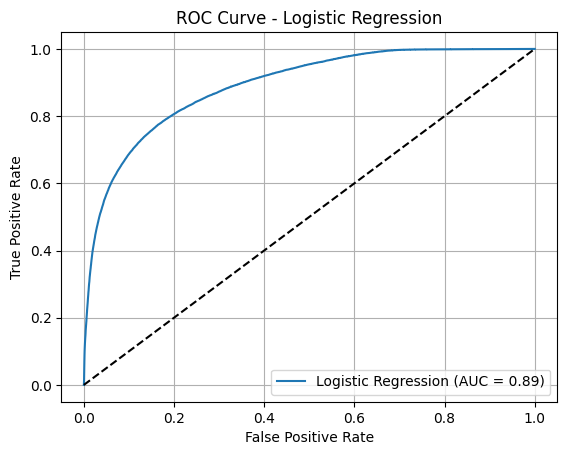



==== Decision Tree ====
Confusion Matrix:
 [[219327   1725]
 [ 27042   3458]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94    221052
         1.0       0.67      0.11      0.19     30500

    accuracy                           0.89    251552
   macro avg       0.78      0.55      0.57    251552
weighted avg       0.86      0.89      0.85    251552

Accuracy: 0.8856
Precision: 0.6672
Recall: 0.1134
F1 Score: 0.1938
AUC: 0.7783


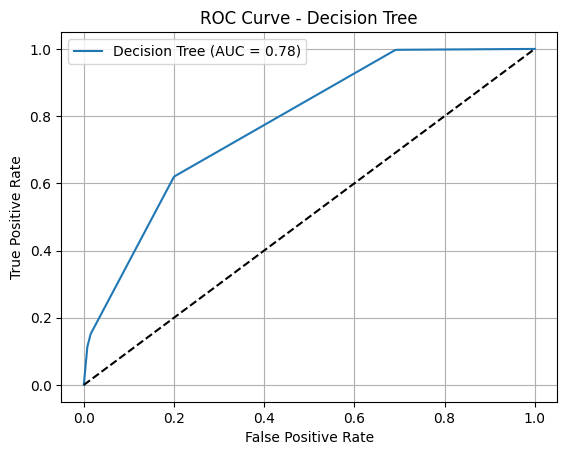


Baseline results saved.


In [28]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard Scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Evaluation Function
def evaluate_model(y_true, y_pred, y_proba, title):
    print(f"\n\n==== {title} ====")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    auc = roc_auc_score(y_true, y_proba)
    print(f"AUC: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_log, y_proba_log, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, y_proba_dt, "Decision Tree")

# Save Baseline Scores
baseline_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "Recall": recall_score(y_test, y_pred_log),
        "F1": f1_score(y_test, y_pred_log),
        "AUC": roc_auc_score(y_test, y_proba_log)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1": f1_score(y_test, y_pred_dt),
        "AUC": roc_auc_score(y_test, y_proba_dt)
    }
}

os.makedirs('C:\\Users\\Admin\\asset_quality_score\\outputs', exist_ok=True)
with open('C:\\Users\\Admin\\asset_quality_score\\outputs\\baseline_results.json', 'w') as f:
    import json
    json.dump(baseline_results, f, indent=4)

print("\nBaseline results saved.")


In [29]:
X_train.to_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\X_train.csv', index=False)
X_test.to_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\X_test.csv', index=False)
y_train.to_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\y_train.csv', index=False)
y_test.to_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\y_test.csv', index=False)